**ENGY-4390** Nuclear Systems Design and Analysis, UMass Lowell, Chem. Eng. Nuclear Program Fall 2024; Prof. V. F. de Almeida

# Constant Thermal Conductivity, Constant Source, and Dirichlet BC <br> (Gold Solution)
$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\fvec}{\boldsymbol{\mathsf{f}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
  \newcommand{\Reals}{\mathbb{R}}
  \newcommand{\thetavec}{\boldsymbol{\theta}}
  \newcommand{\normal}{\boldsymbol{n}}
  \newcommand{\flux}{\boldsymbol{q}}
  \newcommand{\ihat}{\hat{\boldsymbol{i}}}
  \newcommand{\rhat}{\hat{\boldsymbol{r}}}
  \newcommand{\Ecal}{\mathscr{E}}
  \newcommand{\Dcal}{\mathscr{D}}
$

**Course:** ENGY-4390 Nuclear Systems Design and Analysis  <br>
**Author: Valmor F. de Almeida** 

UMass Lowell, Dept. of Chemical Engineering, Nuclear Energy Program 
<br>
**10Dec2024**

## Objectives

 + Solve a 1-D heat conduction problem with source and specified temperature at the boundaries.
 + Provide results to be used as a reference for other solutions.  

## [Poisson Problem with Dirichlet Boundary Conditions](#toc)<a id="problem"></a>

The following sections describe what is referred to in the literature as the one-dimensional Poisson problem with Dirichlet boundary conditions. This is a classical boundary-value problem of mathematics.

Solve the Poisson model problem. Find $u:[a,b]\subset\Reals\rightarrow\Reals$ such that:
 
\begin{align*}
 -\bigl(-k(x)\, u'\bigr)'(x) + f(x) &= 0 \quad\quad \forall \quad\quad x\in\ ]a,b[, \\
 u(a) &= u_a, \\
 u(b) &= u_b.
\end{align*}
   
This problem is linear and has an analytical solution for given data: diffusion coefficient, $k(x)$, and source bias, $f(x)$. The *heat flux* associated to the quantity $u$, is denoted $q := -k(x)\,u'$, and it is often of interest as a derived quantity. Re-writing the above in terms of the differential operator $\Dcal u := -\bigl(-k(\cdot)\, u'\bigr)'(\cdot)$
 
\begin{align*}
 \Dcal u(x) + f(x) &= 0 \quad\quad \forall \quad\quad x\in\ ]a,b[, \\
 u(a) &= u_a, \\
 u(b) &= u_b.
\end{align*}

The values of the dependent variable are given on the two end points of the domain. This is called *essential* boundary conditions or  *Dirichlet boundary conditions*. If the values are equal to zero, the boundary condition is referred to as homogeneous.

## [Rayleigh-Ritz Method w/ Inhomogeneous Dirichlet Boundary Conditions](#toc)<a id="rayleigh-ritz-inhomogeneous"></a>

Find $u^*_N \in V_N(a,b)\subset V(a,b) = \bigl\{ u:[a,b]\subset\Reals\rightarrow\Reals \bigr\}$ such that it minimizes the Poisson energy norm:

\begin{equation*}
  \norm{u_0+w-u^*_N}^2_{\Ecal} = \min\limits_{u_N\, \in\, V_N} \norm{u_0+w-u_N}^2_{\Ecal},
\end{equation*}

where 
$V_N(a,b) := \bigl\{ u_N = \sum\limits_{i=1}^N\,c_i\,\phi_i \mid u_N(a) = u_N(b) = 0, (u'_N,u'_N) < \infty \bigr\}$, $\{\phi_i\mid i=1\ldots,N\}$ is a basis of $V_N(a,b)$, and any $w \in V$ with $w(a) = u_a$, $w(b) = u_b$ is called the *lift* function. $u_0 \in V(a,b)$ is the solution of the homogeneous problem. The Poisson energy norm is defined as $\norm{v}_{\Ecal} := (\Dcal v,v) = (v, \Dcal v)$.

The optimum coefficients $\cvec^* := \{c_i\mid i=1,\ldots,N\}$ solve

\begin{equation*}
 \overset{(N\times N)}{\Amtrx}\,\overset{(N\times 1)}{\cvec^*} = \overset{(N\times 1)}\bvec ,
\end{equation*}

where:
  + $A_{i,j} = (k\,\phi'_i,\phi'_j)$
  + $b_i = (f,\phi_i) - (k\,w',\phi'_i)$
  
This formulation uses basis functions that satisfy homogeneous boundary conditions, however the linear algebraic problem for the optimum coefficients accounts for the inhomogeneous boundary condition data through the lift function $w$. Therefore the solution is

\begin{equation*}
 u^*_N = u_0 + w.
\end{equation*}

### Data
Solve problem with parameter values:

 > a = 0 cm  <br>
 > b = 5 cm  <br>
 > u(a) = 20 C <br>
 > u(b) = 40 C <br>
 > k = 42 W/(mK) <br>
 > f = 824604 W/m^2

In [1]:
'''SI units'''
from scipy import constants as unit
unit.second = 1.0
unit.meter = 1.0
unit.cm = unit.centi*unit.meter
unit.watt = 1
unit.kelvin = 1

In [2]:
'''Domain'''
x_a = 0*unit.cm
x_b = 5*unit.cm
x_bar = (x_a + x_b)/2.0
x_l   = x_b - x_a

u_a = unit.convert_temperature(20, 'C', 'K')
u_b = unit.convert_temperature(40, 'C', 'K')
delta_u = u_b - u_a

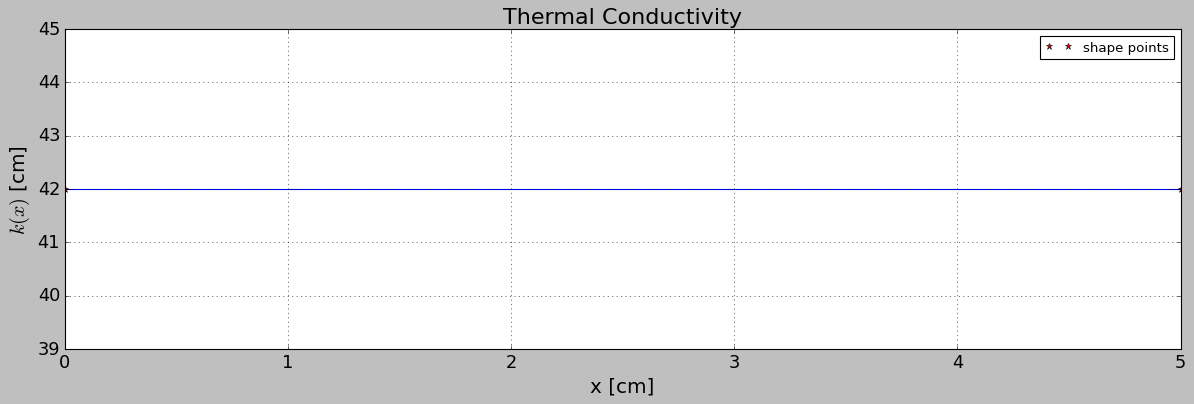

In [3]:
'''Thermal conductivity coefficient function'''
from pyfem1d.toolkit import TargetFunction   

k_cond = 42*unit.watt/unit.meter/unit.kelvin

shape_pts = [(x_a, k_cond), (x_b, k_cond)]

k_cond_func = TargetFunction(shape_pts, type='linear')
  
k_cond_func.plot(n_plot_pts=20, show_shape_pts=True, 
                title='Thermal Conductivity', y_label=r'$k(x)$ [cm]', x_label='x [cm]', 
                x_scale=1/unit.cm)

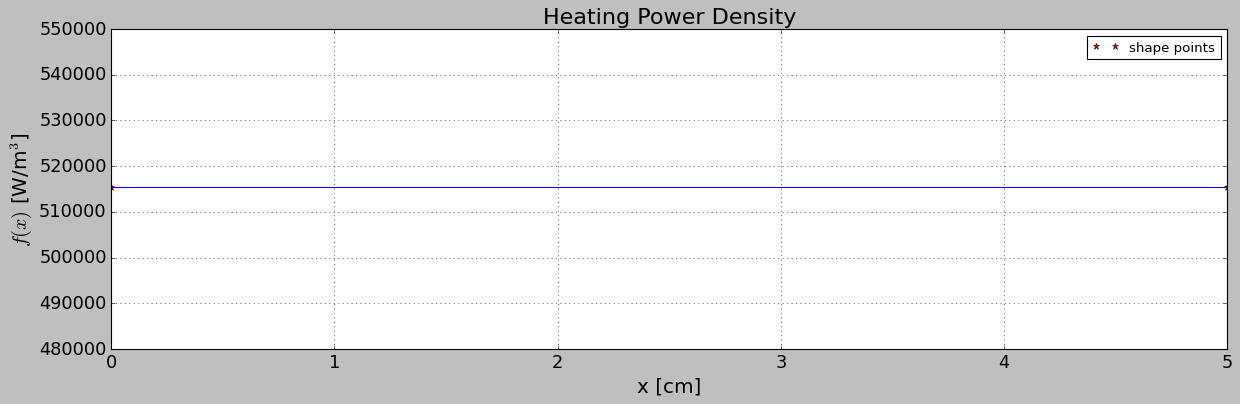

In [4]:
'''Heating power density function'''
from pyfem1d.toolkit import TargetFunction   

heating_pwr_dens = 2.5*206151.0*unit.watt/unit.meter**3

shape_pts = [(x_a, heating_pwr_dens), (x_b, heating_pwr_dens)]

heating_pwr_dens_func = TargetFunction(shape_pts, type='linear')
  
heating_pwr_dens_func.plot(n_plot_pts=20, show_shape_pts=True, 
                title='Heating Power Density', y_label=r'$f(x)$ [W/m$^3$]', x_label='x [cm]', 
                x_scale=1/unit.cm)

### Finite Element Basis Functions

Specify basis functions distribution on the material domain and degree.

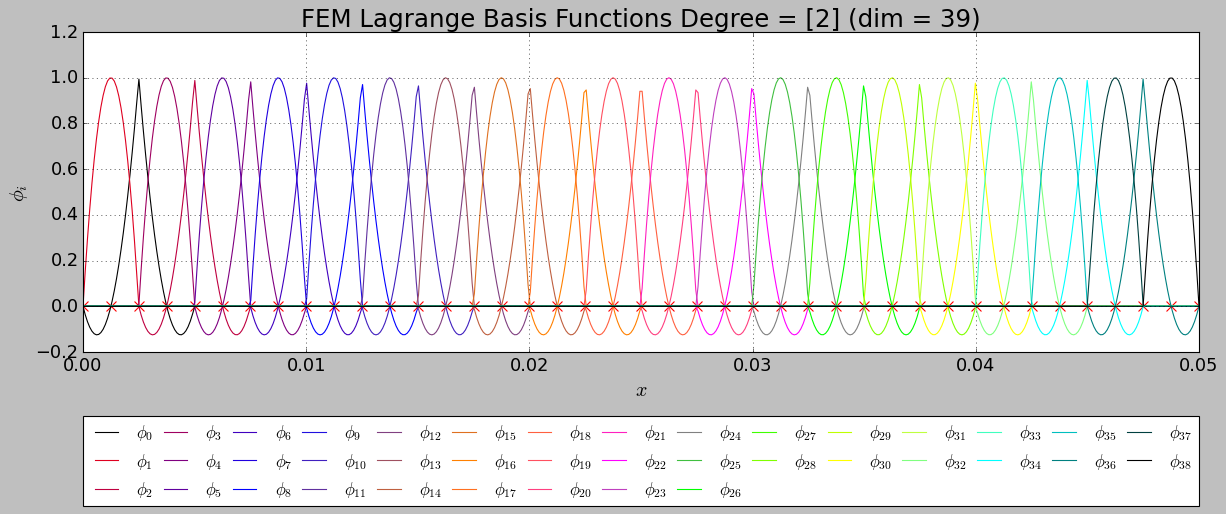

In [5]:
'''Build basis functions'''
from pyfem1d.toolkit import LagrangeFEMBasis 

degree = [2]
n_elem = [20]

femlb = LagrangeFEMBasis(degree=degree, n_elem=n_elem, x_partition=[x_a, x_b], bc_x_min='dirichlet', bc_x_max='dirichlet')
femlb.plot(n_plot_pts=500, n_legend_cols=15)

### Lift Function

Build the lift function for Dirichlet BC.

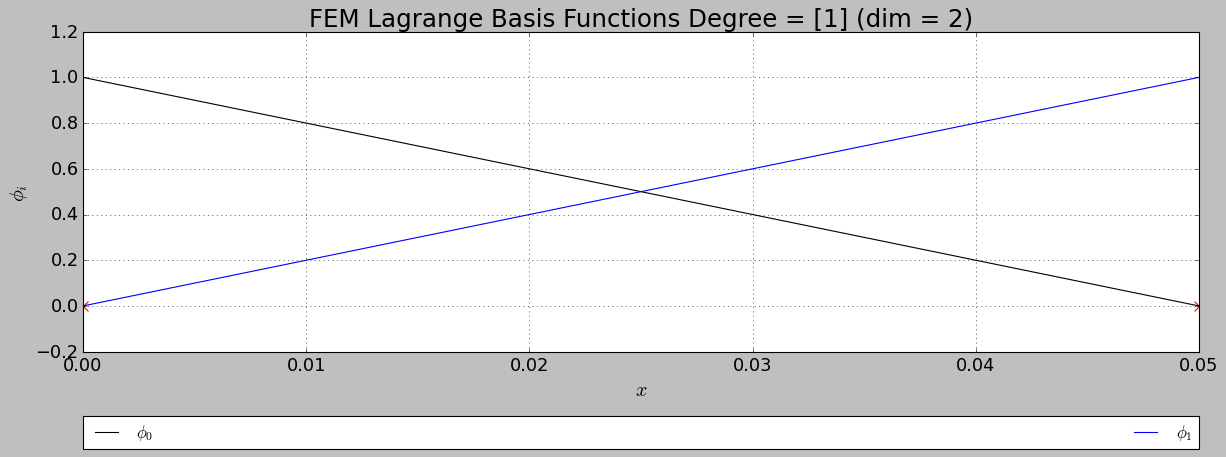

In [6]:
'''Build the lift basis functions'''

degree = 1
lift_basis = LagrangeFEMBasis(degree=degree, n_elem=1, x_partition=[x_a, x_b])
lift_basis.plot(n_plot_pts=20)

In [7]:
'''Build the coefficients of the lift function'''

import numpy as np
alpha_vec = np.zeros(len(lift_basis.basis_func_list))
alpha_vec[0] = u_a
if degree == 2:
   alpha_vec[-2] = u_b
else:
   alpha_vec[-1] = u_b

In [8]:
'''Build the lift function'''

def w_lift(x):
    return  lift_basis.evaluation_matrix(x)@alpha_vec

In [9]:
'''Build the lift function derivative'''

def w_lift_prime(x):
    return lift_basis.evaluation_matrix(x, derivative=True)@alpha_vec

In [10]:
'''Test boundary values'''

print('w(a) = ',w_lift(x_a), ' w(b) = ', w_lift(x_b))

w(a) =  [293.15]  w(b) =  [313.15]


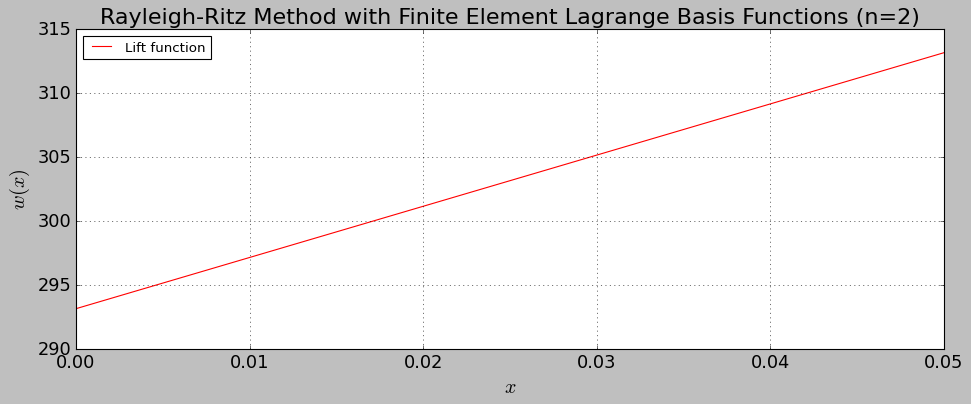

In [11]:
'''Rayleigh Ritz Method with Lagrange Basis Functions'''

n_pts = 500
x = np.linspace(x_a, x_b, n_pts)
u_values = w_lift(x)

import matplotlib.pyplot as plt
plt.figure(1, figsize=(14, 5))

plt.plot(x, u_values, 'r-', label='Lift function')

plt.title(r'Rayleigh-Ritz Method with Finite Element Lagrange Basis Functions (n='+str(len(lift_basis.basis_func_list))+')', fontsize=20)
plt.ylabel(r'$w(x)$', fontsize=18)
plt.xlabel(r'$x$', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc='best',fontsize=12)
plt.grid(True)
plt.show()

#### [Assembly of $\Amtrx$](#toc)<a id="assemble-A-spatial"></a>
  + $A_{i,j} = (k\,\phi'_j,\phi'_i)$

In [12]:
'''Build the matrix of coefficients of the linear system'''

a_mtrx = femlb.inner_product_matrix(k_cond_func, "u'", "v'")

In [13]:
try:    
    from pyfem1d.toolkit import matrix_rank
except ModuleNotFoundError:
    assert False, 'You need to provide your own code here. Bailing out.'
    
if matrix_rank(a_mtrx, tol=1e-6) == min(a_mtrx.shape):
    print('matrix is full rank.')
else:
    print('matrix is rank deficient.')

import numpy as np
print(np.linalg.matrix_rank(a_mtrx), a_mtrx.shape)

matrix is full rank.
39 (39, 39)


#### [Assembly of $\bvec$](#toc)<a id="assemble-b-spatial"></a>
  + $b_i = (f,\phi_i) - (k\,w',\phi'_i)$

In [14]:
'''Build the load vector'''

k_cond_func_x_w_lift_prime = lambda x: k_cond_func(x) * w_lift_prime(x)

b_vec = femlb.inner_product_vector(heating_pwr_dens_func, 'v')
b_vec -= femlb.inner_product_vector(k_cond_func_x_w_lift_prime, "v'")

#### [Compute Rayleigh-Ritz Solution](#toc)<a id="assemble-b-spatial"></a>

In [15]:
'''Compute optimal coefficients'''
import numpy as np
c_star_vec = np.linalg.solve(a_mtrx, b_vec)

In [25]:
'''Build the best approximation function in V_N'''

def u_star(x):
    u_0 = femlb.evaluation_matrix(x)@c_star_vec
    w = lift_basis.evaluation_matrix(x)@alpha_vec
    u = u_0 + w
    return u[0] if len(u) == 1 else u

In [23]:
'''Build the derivative '''

def u_prime_star(x):
    u_0 = femlb.evaluation_matrix(x, derivative=True)@c_star_vec
    w = lift_basis.evaluation_matrix(x, derivative=True)@alpha_vec
    u_prime = u_0 + w
    return u_prime[0] if len(u_prime) == 1 else u_prime

In [26]:
'''Build the heat flux of the best approximation in V_N'''

def heat_flux_x(x):
    q = - k_cond_func(x) * u_prime_star(x)
    return q[0] if len(q) == 1 else q

## Results
Data provided for comparison.

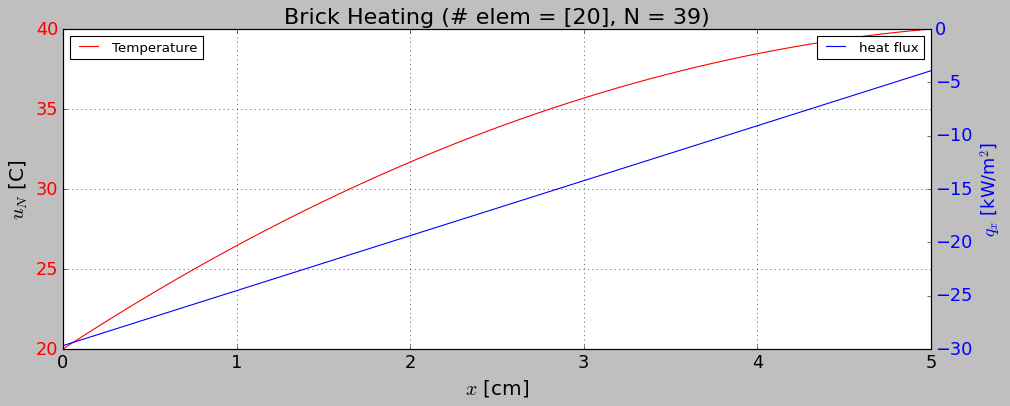

In [27]:
'''Rayleigh Ritz Method with Lagrange FE Basis Functions'''

n_pts = 100
x = np.linspace(x_a, x_b, n_pts)
u_values = u_star(x)
heat_flux_x_values = heat_flux_x(x)

import matplotlib.pyplot as plt
(fig, ax1) = plt.subplots(1, figsize=(14, 5))

ax1.plot(x/unit.cm, unit.convert_temperature(u_values, 'K', 'C'), 'r-', label='Temperature')
ax1.set_xlabel(r'$x$ [cm]', fontsize=18)
ax1.set_ylabel(r'$u_N$ [C]', fontsize=18)
ax1.tick_params(axis='y', labelcolor='red', labelsize=16)
ax1.tick_params(axis='x', labelsize=16)
ax1.legend(loc='upper left', fontsize=12)
ax1.grid(True)

ax2 = ax1.twinx()
ax2.plot(x/unit.cm, heat_flux_x_values/1000,'-', color='blue', label='heat flux')
ax2.set_ylabel(r"$q_x$ [kW/m$^2$]", fontsize=16, color='blue')
ax2.tick_params(axis='y', labelcolor='blue', labelsize=16)
ax2.legend(loc='upper right', fontsize=12)

plt.title(r'Brick Heating (# elem = '+str(n_elem)+', N = '+str(len(femlb.basis_func_list))+')', fontsize=20)
plt.show()

In [28]:
'''Rayleigh-Ritz solution evaluated at the boundaries'''

np.set_printoptions(precision=5)
print('u^*_N:')
print('u^*_N(a) [K]= ', u_star(x_a), '  u^*_N(b) [K]= ', u_star(x_b))
print('')
print("u^*'_N:")
print("u^*'_N(a) [K/m]= ", u_prime_star(x_a), " u^*'_N(b) [K/m]= ", u_prime_star(x_b))

u^*_N:
u^*_N(a) [K]=  293.15   u^*_N(b) [K]=  313.15

u^*'_N:
u^*'_N(a) [K/m]=  706.7723214285639  u^*'_N(b) [K/m]=  93.2276785714347


In [29]:
'''Normal heat flux at x = a'''

n_x = -1.0
print('q_x(a) [kW/m^2]= ', -k_cond_func(x_a)*u_prime_star(x_a)/unit.kilo * n_x)
print('q_x(a)_exact = ', (heating_pwr_dens_func(x_a )* (x_bar-x_a) + k_cond_func(x_a) * delta_u/x_l)/unit.kilo)

q_x(a) [kW/m^2]=  29.68443749999969
q_x(a)_exact =  29.6844375


In [34]:
'''Normal heat flux at x = b'''

n_x = 1.0
print('q_x(b) [kW/m^2]= ', -k_cond_func(x_b)*u_prime_star(x_b)/unit.kilo * n_x)
print('q_x(b)_exact = ', -(heating_pwr_dens_func(x_b) * (x_bar-x_b) + k_cond_func(x_b) * delta_u/x_l)/unit.kilo)

q_x(b) [kW/m^2]=  -3.915562500000257
q_x(b)_exact =  -3.9155625


In [35]:
x_vec = np.linspace(x_a, x_b, 30)
u_n_vec = u_star(x_vec)
q_x_vec = -k_cond_func(x_vec)*u_prime_star(x_vec)
from exact_solutions import u_exact_dirichlet
u_exac_vec = u_exact_dirichlet(x_vec, x_bar, x_l, delta_u, f, k)

print('x [cm]        u_n [C]    q_N [kW/m^2]')
for (x, u_n, q_N) in zip(x_vec, u_n_vec, q_x_vec):
    print('%+2.5e   %+2.5e     %+2.5e'%(x/unit.cm, unit.convert_temperature(u_n, 'K','C'), q_N/unit.kilo))

x [cm]        u_n [C]    q_N [kW/m^2]
+0.00000e+00   +2.00000e+01     -2.96844e+01
+1.72414e-01   +2.12003e+01     -2.87959e+01
+3.44828e-01   +2.23642e+01     -2.79073e+01
+5.17241e-01   +2.34916e+01     -2.70187e+01
+6.89655e-01   +2.45825e+01     -2.61301e+01
+8.62069e-01   +2.56369e+01     -2.52415e+01
+1.03448e+00   +2.66549e+01     -2.43529e+01
+1.20690e+00   +2.76363e+01     -2.34644e+01
+1.37931e+00   +2.85813e+01     -2.25758e+01
+1.55172e+00   +2.94898e+01     -2.16872e+01
+1.72414e+00   +3.03619e+01     -2.07986e+01
+1.89655e+00   +3.11974e+01     -1.99100e+01
+2.06897e+00   +3.19965e+01     -1.90215e+01
+2.24138e+00   +3.27591e+01     -1.81329e+01
+2.41379e+00   +3.34853e+01     -1.72443e+01
+2.58621e+00   +3.41749e+01     -1.63557e+01
+2.75862e+00   +3.48281e+01     -1.54671e+01
+2.93103e+00   +3.54448e+01     -1.45785e+01
+3.10345e+00   +3.60250e+01     -1.36900e+01
+3.27586e+00   +3.65688e+01     -1.28014e+01
+3.44828e+00   +3.70760e+01     -1.19128e+01
+3.62069e+00   +3

In [36]:
x_vec/unit.cm

array([0.     , 0.17241, 0.34483, 0.51724, 0.68966, 0.86207, 1.03448,
       1.2069 , 1.37931, 1.55172, 1.72414, 1.89655, 2.06897, 2.24138,
       2.41379, 2.58621, 2.75862, 2.93103, 3.10345, 3.27586, 3.44828,
       3.62069, 3.7931 , 3.96552, 4.13793, 4.31034, 4.48276, 4.65517,
       4.82759, 5.     ])

In [37]:
unit.convert_temperature(u_n_vec, 'K', 'C')

array([20.     , 21.20033, 22.36419, 23.49157, 24.58248, 25.6369 ,
       26.65485, 27.63632, 28.58132, 29.48983, 30.36188, 31.19744,
       31.99653, 32.75913, 33.48527, 34.17492, 34.8281 , 35.4448 ,
       36.02502, 36.56877, 37.07604, 37.54683, 37.98115, 38.37899,
       38.74035, 39.06523, 39.35364, 39.60557, 39.82102, 40.     ])

In [38]:
q_x_vec/unit.kilo

array([-29.68444, -28.79586, -27.90727, -27.01869, -26.13011, -25.24153,
       -24.35295, -23.46436, -22.57578, -21.6872 , -20.79862, -19.91004,
       -19.02145, -18.13287, -17.24429, -16.35571, -15.46713, -14.57855,
       -13.68996, -12.80138, -11.9128 , -11.02422, -10.13564,  -9.24705,
        -8.35847,  -7.46989,  -6.58131,  -5.69273,  -4.80414,  -3.91556])

In [39]:
'''Save text file with values'''

x_vec = np.linspace(x_a, x_b, 100)
u_n_vec = u_star(x_vec)
q_x_vec = -k_cond_func(x_vec)*u_prime_star(x_vec)

np.savetxt('gold-data/01-test-gold.txt', (x_vec/unit.cm, unit.convert_temperature(u_n_vec, 'K','C'), q_x_vec/unit.kilo), delimiter=' ', fmt='%2.6e') 

# For reading do: (x,u,q) = np.loadtxt('01-test-gold.txt')

## References

- [1] V. F. de Almeida, [*Engy-5330: Computational Continuum Transport Phenomena*](https://github.com/dpploy/engy-5330), University of Massachusetts Lowell, Dept. of Chemical Engineering (Nuclear Energy Program).